In [1]:
.libPaths( c( "~/R/x86_64-pc-linux-gnu-library/4.1" , .libPaths() ) )

In [2]:
library(tidyverse)
library(DESeq2)
library(tximeta)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The follow

In [3]:
coldata <- read.table("./salmon/sampfile.csv", sep=",", header=TRUE)
coldata

files,names
<chr>,<chr>
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A10_S169_quant/quant.sf,A10_S169_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A10_S265_quant/quant.sf,A10_S265_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A10_S73_quant/quant.sf,A10_S73_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A11_S177_quant/quant.sf,A11_S177_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A11_S273_quant/quant.sf,A11_S273_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A11_S81_quant/quant.sf,A11_S81_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A12_S185_quant/quant.sf,A12_S185_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A12_S281_quant/quant.sf,A12_S281_quant
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A12_S89_quant/quant.sf,A12_S89_quant


In [4]:
celline <- read.table("../celline_data.csv", sep=",", header=TRUE)
celline["X"] <- str_c(celline[["X"]], "_quant")
celline

X,cell_line
<chr>,<chr>
A10_S169_quant,BT474_SETB
A10_S265_quant,CHO
A10_S73_quant,MCF7
A11_S177_quant,BT474_SETB
A11_S273_quant,CHO
A11_S81_quant,MCF7
A12_S185_quant,BT474_SETB
A12_S281_quant,CHO
A12_S89_quant,MCF7


In [5]:
coldata <- dplyr::left_join(coldata, celline, by=c("names" = "X"))
coldata

files,names,cell_line
<chr>,<chr>,<chr>
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A10_S169_quant/quant.sf,A10_S169_quant,BT474_SETB
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A10_S265_quant/quant.sf,A10_S265_quant,CHO
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A10_S73_quant/quant.sf,A10_S73_quant,MCF7
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A11_S177_quant/quant.sf,A11_S177_quant,BT474_SETB
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A11_S273_quant/quant.sf,A11_S273_quant,CHO
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A11_S81_quant/quant.sf,A11_S81_quant,MCF7
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A12_S185_quant/quant.sf,A12_S185_quant,BT474_SETB
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A12_S281_quant/quant.sf,A12_S281_quant,CHO
/home/sailor/Documents/Work/EMUscRNA/Salmon/salmon/A12_S89_quant/quant.sf,A12_S89_quant,MCF7


In [6]:
se <- tximeta(coldata)
se

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 
78 
79 
80 
81 
82 
83 
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100 
101 
102 
103 
104 
105 
106 
107 
108 
109 
110 
111 
112 
113 
114 
115 
116 
117 
118 
119 
120 
121 
122 
123 
124 
125 
126 
127 
128 
129 
130 
131 
132 
133 
134 
135 
136 
137 
138 
139 
140 
141 
142 
143 
144 
145 
146 
147 
148 
149 
150 
151 
152 
153 
154 
155 
156 
157 
158 
159 
160 
161 
162 
163 
164 
165 
166 
167 
168 
169 
170 
171 
172 
173 
174 
175 
176 
177 
178 
179 
180 
181 
182 
183 
184 
185 
186 
187 
188 
189 
190 
191 
192 
193 
194 
195 
196 
197 
198 
199 
200 
201 
202 
203 
204 
205 
206 
207 
208 
209 
210 

class: RangedSummarizedExperiment 
dim: 177456 288 
metadata(6): tximetaInfo quantInfo ... txomeInfo txdbInfo
assays(3): counts abundance length
rownames(177456): ENST00000631435 ENST00000415118 ... ENST00000646356
  ENST00000645792
rowData names(8): tx_id tx_biotype ... tx_id_version tx_name
colnames(288): A10_S169_quant A10_S265_quant ... H9_S264_quant
  H9_S72_quant
colData names(2): names cell_line

In [7]:
gse <- summarizeToGene(se)
gse

loading existing EnsDb created: 2022-07-16 16:22:59

obtaining transcript-to-gene mapping from database

generating gene ranges

summarizing abundance

summarizing counts

summarizing length



class: RangedSummarizedExperiment 
dim: 37951 288 
metadata(6): tximetaInfo quantInfo ... txomeInfo txdbInfo
assays(3): counts abundance length
rownames(37951): ENSG00000000003 ENSG00000000005 ... ENSG00000288031
  ENSG00000288053
rowData names(9): gene_id gene_name ... entrezid tx_ids
colnames(288): A10_S169_quant A10_S265_quant ... H9_S264_quant
  H9_S72_quant
colData names(2): names cell_line

In [8]:
#Import QC.
stat <- read.csv("./qc_stats_emucscrna.csv")
stat

X,sample,Genes_per_cell,Counts_per_cell,alignment_eff,Sample_Name,Sample_Plate,Sample_Well,Cell.Count
<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,A10_S169_quant,11,11.000,0.3928570,A10,BT474_SETB,G01,2
2,A10_S265_quant,7271,268773.961,0.1119180,A10,CHO,G01,1
3,A10_S73_quant,23,24.000,0.3076920,A10,MCF7,G01,1
4,A11_S177_quant,12130,2209382.972,0.9018400,A11,BT474_SETB,G09,1
5,A11_S273_quant,6673,282441.989,0.1107310,A11,CHO,G09,1
6,A11_S81_quant,10946,3220091.011,0.8781640,A11,MCF7,G09,1
7,A12_S185_quant,11813,1875505.948,0.8921700,A12,BT474_SETB,H05,1
8,A12_S281_quant,6765,265537.999,0.1108280,A12,CHO,H05,1
9,A12_S89_quant,11,11.000,0.5000000,A12,MCF7,H05,1


In [9]:
keep <- (stat %>% dplyr::filter(Counts_per_cell > 100000 & alignment_eff > 0.8))[["sample"]]
keep


[1] "A11_S177_quant" "A11_S81_quant"  "A12_S185_quant" "A2_S105_quant" 
  [5] "A2_S9_quant"    "A3_S113_quant"  "A3_S17_quant"   "A4_S121_quant" 
  [9] "A5_S129_quant"  "A5_S33_quant"   "A6_S137_quant"  "A6_S41_quant"  
 [13] "A7_S49_quant"   "A8_S153_quant"  "A8_S57_quant"   "A9_S65_quant"  
 [17] "B11_S82_quant"  "B12_S186_quant" "B1_S98_quant"   "B2_S106_quant" 
 [21] "B2_S10_quant"   "B3_S114_quant"  "B3_S18_quant"   "B4_S122_quant" 
 [25] "B5_S130_quant"  "B5_S34_quant"   "B6_S138_quant"  "B6_S42_quant"  
 [29] "B7_S146_quant"  "B8_S154_quant"  "B8_S58_quant"   "B9_S66_quant"  
 [33] "C11_S83_quant"  "C12_S187_quant" "C1_S99_quant"   "C2_S107_quant" 
 [37] "C2_S11_quant"   "C3_S115_quant"  "C3_S19_quant"   "C4_S27_quant"  
 [41] "C5_S131_quant"  "C5_S35_quant"   "C6_S139_quant"  "C6_S43_quant"  
 [45] "C7_S51_quant"   "C8_S155_quant"  "C8_S59_quant"   "C9_S67_quant"  
 [49] "D10_S172_quant" "D11_S84_quant"  "D12_S188_quant" "D1_S100_quant" 
 [53] "D2_S108_quant"  "D2_S12_quant"   "D3_S116_quant"  "D3_S20_quant"  
 [57] "D4_S124_quant"  "D5_S132_quant"  "D5_S36_quant"   "D6_S140_quant" 
 [61] "D6_S44_quant"   "D7_S148_quant"  "D8_S156_quant"  "D8_S60_quant"  
 [65] "D9_S68_quant"   "E10_S173_quant" "E12_S189_quant" "E1_S101_quant" 
 [69] "E1_S5_quant"    "E2_S109_quant"  "E3_S117_quant"  "E3_S21_quant"  
 [73] "E4_S125_quant"  "E4_S29_quant"   "E5_S37_quant"   "E6_S141_quant" 
 [77] "E7_S149_quant"  "E7_S53_quant"   "E8_S61_quant"   "E9_S69_quant"  
 [81] "F10_S174_quant" "F12_S190_quant" "F1_S102_quant"  "F1_S6_quant"   
 [85] "F2_S110_quant"  "F3_S118_quant"  "F3_S22_quant"   "F4_S126_quant" 
 [89] "F4_S30_quant"   "F5_S134_quant"  "F6_S142_quant"  "F7_S150_quant" 
 [93] "F7_S54_quant"   "F8_S62_quant"   "F9_S70_quant"   "G10_S175_quant"
 [97] "G10_S79_quant"  "G11_S183_quant" "G12_S191_quant" "G1_S103_quant" 
[101] "G1_S7_quant"    "G2_S111_quant"  "G3_S119_quant"  "G3_S23_quant"  
[105] "G4_S127_quant"  "G5_S39_quant"   "G6_S143_quant"  "G7_S151_quant" 
[109] "G7_S55_quant"   "G8_S63_quant"   "G9_S167_quant"  "G9_S71_quant"  
[113] "H10_S176_quant" "H10_S80_quant"  "H11_S184_quant" "H12_S192_quant"
[117] "H1_S104_quant"  "H1_S8_quant"    "H2_S112_quant"  "H3_S120_quant" 
[121] "H3_S24_quant"   "H4_S128_quant"  "H4_S32_quant"   "H5_S136_quant" 
[125] "H6_S144_quant"  "H7_S152_quant"  "H7_S56_quant"   "H8_S64_quant"  
[129] "H9_S168_quant"  "H9_S72_quant"

In [10]:
gse <- gse[,colnames(gse) %in% keep]
gse

class: RangedSummarizedExperiment 
dim: 37951 130 
metadata(6): tximetaInfo quantInfo ... txomeInfo txdbInfo
assays(3): counts abundance length
rownames(37951): ENSG00000000003 ENSG00000000005 ... ENSG00000288031
  ENSG00000288053
rowData names(9): gene_id gene_name ... entrezid tx_ids
colnames(130): A11_S177_quant A11_S81_quant ... H9_S168_quant
  H9_S72_quant
colData names(2): names cell_line

In [15]:
assay(gse)

,A11_S177_quant,A11_S81_quant,A12_S185_quant,A2_S105_quant,A2_S9_quant,A3_S113_quant,A3_S17_quant,A4_S121_quant,A5_S129_quant,A5_S33_quant,⋯,H3_S24_quant,H4_S128_quant,H4_S32_quant,H5_S136_quant,H6_S144_quant,H7_S152_quant,H7_S56_quant,H8_S64_quant,H9_S168_quant,H9_S72_quant
ENSG00000000003,20.901,155.511,40.994,13.000,102.150,66.955,67.000,2.000,40.000,158.987,⋯,55.000,27.000,428.748,30.075,27.004,20.000,256.000,64.948,19.980,72.000
ENSG00000000005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ENSG00000000419,288.000,97.000,121.000,266.000,215.000,368.999,144.000,9.000,165.000,286.000,⋯,128.001,166.999,334.000,92.000,158.000,142.000,227.000,96.001,149.001,263.001
ENSG00000000457,33.248,0.000,62.587,20.287,0.000,25.032,18.337,2.000,23.454,3.711,⋯,7.000,11.290,3.358,38.000,1.000,6.108,63.000,4.000,25.018,17.000
ENSG00000000460,231.800,1.113,156.051,594.522,7.192,316.765,18.664,15.365,136.815,27.292,⋯,0.000,69.833,43.369,129.734,26.842,154.140,13.072,5.000,55.648,203.853
ENSG00000000938,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ENSG00000000971,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ENSG00000001036,76.000,80.000,77.000,129.000,692.737,99.000,227.000,11.000,71.000,936.905,⋯,548.000,67.000,1560.952,22.000,75.932,25.000,848.867,247.000,41.000,423.310
ENSG00000001084,6.000,100.978,18.000,7.878,23.738,17.003,5.037,1.000,0.000,18.486,⋯,18.825,2.017,225.634,7.036,11.000,11.000,112.090,8.987,10.000,0.000
ENSG00000001167,20.000,0.000,80.000,2.000,91.000,39.000,0.000,1.000,7.000,12.000,⋯,32.000,33.000,19.000,24.000,0.000,19.000,65.000,1.000,67.000,0.000


In [16]:
#Calculating 0s in the data.
(assay(gse) == 0) %>% which() %>% length() / (37951*130)

[1] 0.6982177

In [17]:
dds <- DESeqDataSet(gse, design = ~ cell_line)

using counts and average transcript lengths from tximeta

Warning message in DESeqDataSet(gse, design = ~cell_line):
"some variables in design formula are characters, converting to factors"


In [18]:
dds <- DESeq(dds, test="LRT", reduced=~1, minReplicatesForReplace=Inf, useT=TRUE, minmu=0.1)
res <- results(dds)
res

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): cell line MCF7 vs BT474 SETB 
LRT p-value: '~ cell_line' vs '~ 1' 
DataFrame with 37951 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat      pvalue
                 <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000000003    51.1852        1.94507 0.2606305   54.3935 1.64105e-13
ENSG00000000005     0.0000             NA        NA        NA          NA
ENSG00000000419   153.1871       -0.63051 0.0830621   56.2175 6.48824e-14
ENSG00000000457    22.8878       -1.46748 0.2559140   30.0771 4.15206e-08
ENSG00000000460    80.5651       -1.43762 0.2448625   31.8479 1.66727e-08
...                    ...            ...       ...       ...         ...
ENSG00000287988 0.00000000             NA        NA        NA          NA
ENSG00000288000 0.00303889      -0.107811   3.01096 -1.740950     1.00000
ENSG00000288014 0.00000000             NA        NA        NA          NA
ENSG00000288031 0.39354048       1.180986   1.11890  1.

In [19]:
resd <- data.frame(res)
resd["label"] = ""
resd["color"] = ""
resd["ENSG00000075624","label"] <- "ACTB"
resd["ENSG00000141736","label"] <- "ErbB2"
resd["ENSG00000075624","colour"] <- "red"
resd["ENSG00000141736","colour"] <- "red"

Warning message:
"Removed 15296 rows containing missing values (geom_point)."
Warning message:
"Removed 15296 rows containing missing values (geom_text)."


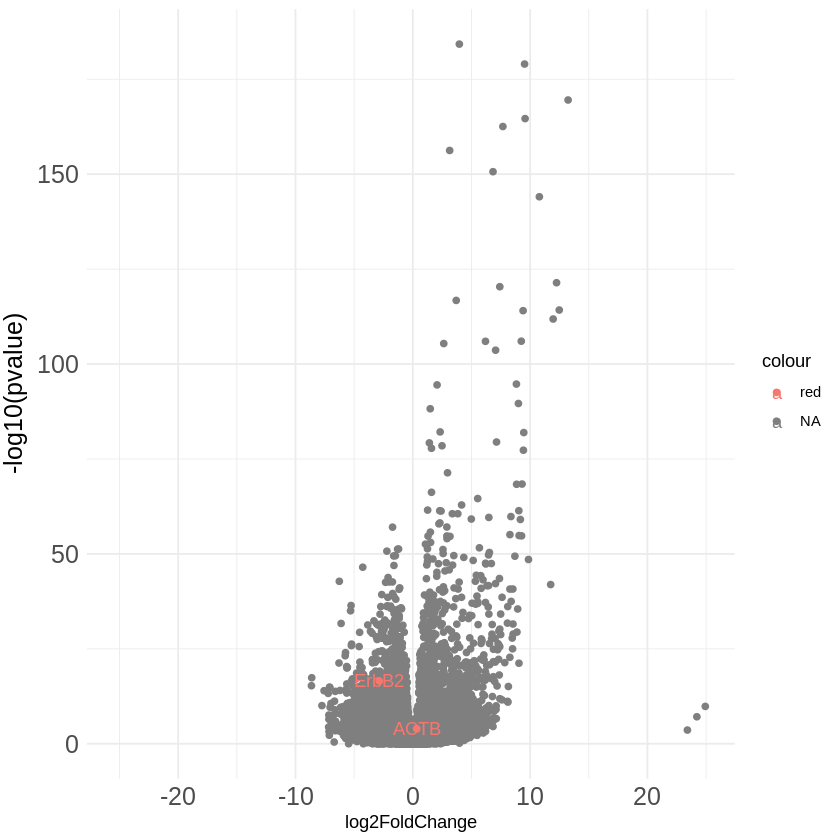

In [20]:
res_plot <- resd %>% mutate(threshold = padj < 0.01)
res_plot <- res_plot %>% arrange(label)

g <- ggplot(data=res_plot, aes(x=log2FoldChange, y=-log10(pvalue), col=colour, label=label)) + 
        geom_point() + 
        theme_minimal() +
        geom_text() +
        theme(axis.title.y = element_text(vjust = 2, size = 15), axis.text.y = element_text(size = 15),
          axis.text.x = element_text(size = 15))
g

In [44]:
#ggsave(file="volcano_MCF7_vs_BT474.svg", plot=g, width=10, height=10)

Warning message:
"Removed 13013 rows containing missing values (geom_point)."
Warning message:
"Removed 13013 rows containing missing values (geom_text)."


In [21]:
#write.csv(resd, "./EMUscRNA_MCF7_vs_BT474_DE_sc_optimal_parameters.csv")